In [6]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *

In [7]:
# Readomg the Nemo and Noaa file
Nemo83 = nemo()
Nemo83.read_nemo('83')
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [8]:
run36 = spinup()
run36.readSpin('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc')
run18 = spinup()
run18.readSpin('/scratch/general/am8e13/results18km_newspinup/spinup18km.nc')

In [9]:
# Arctic Transects
# Barents Strait
barents = [77,-20,79,10]
# Fram Strait
fram = [80,-13,79,10]
# Bering Strait
bering = [64,-169,67,-168]
#Davis Strait
davis = [66,-61,66,-53]
# Arctic 1
arctic1 = [83,-28,74,136]
# Arctic 2
arctic2 = [71,-139,75,53]
# Arctic 3
arctic3 = [78,-115,76,111]
# Arctic 4
arctic4 = [60,180,60,0]
# St Anna Strait
# 

In [10]:
comp_data = {'run36' : run36, 'run18' : run18 , 'Nemo25' : Nemo25 ,'Noaa' : Noaa } #'Nemo83' : Nemo83, }

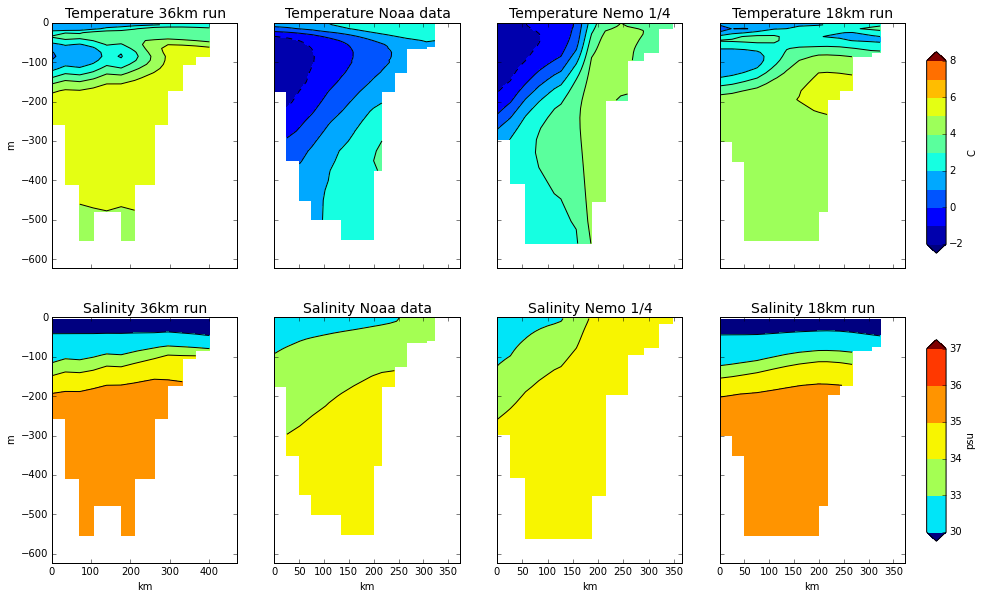

In [11]:
comp_plot(comp_data,davis)

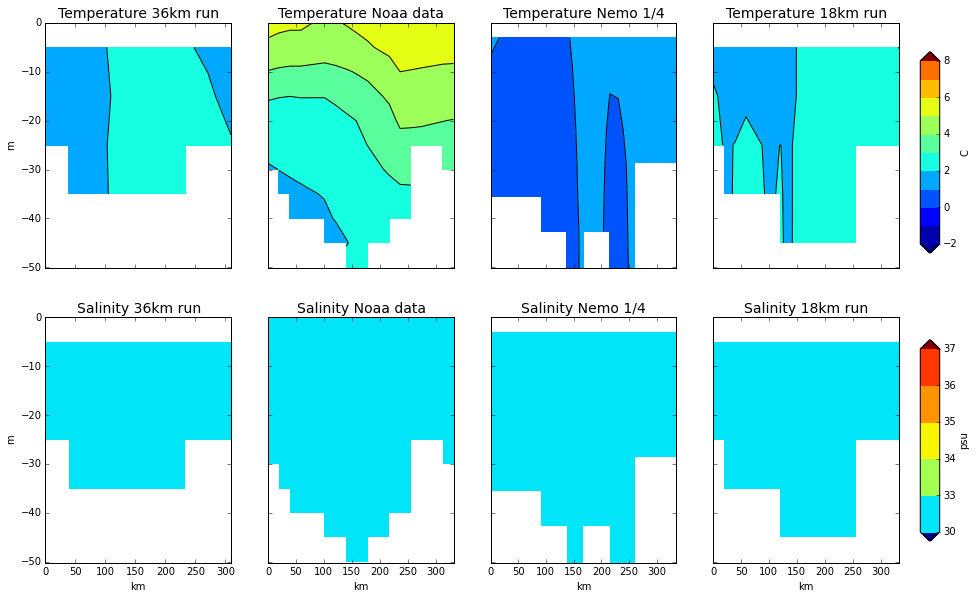

In [12]:
comp_plot(comp_data,bering)

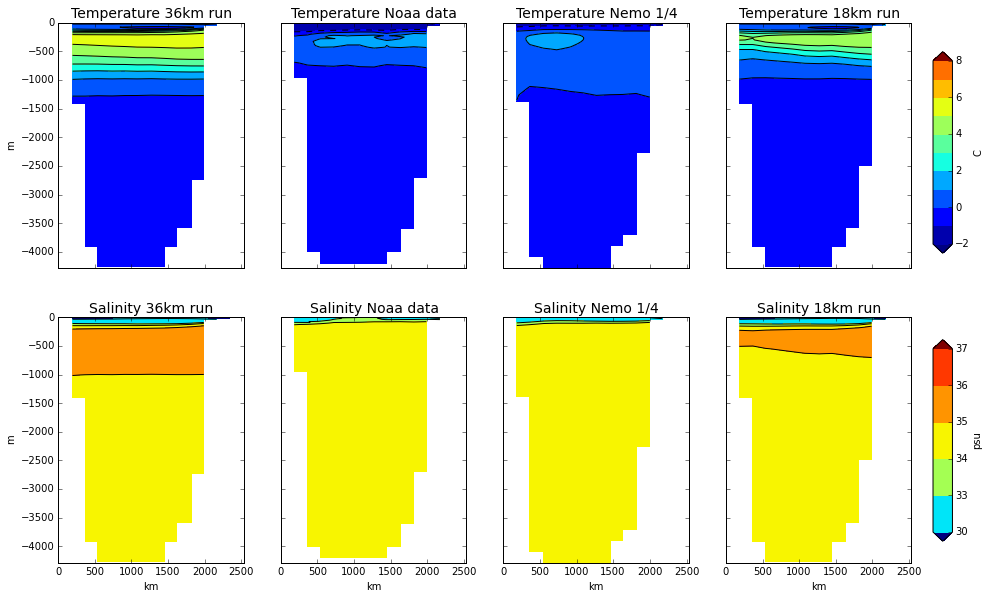

In [13]:
comp_plot(comp_data,arctic1)

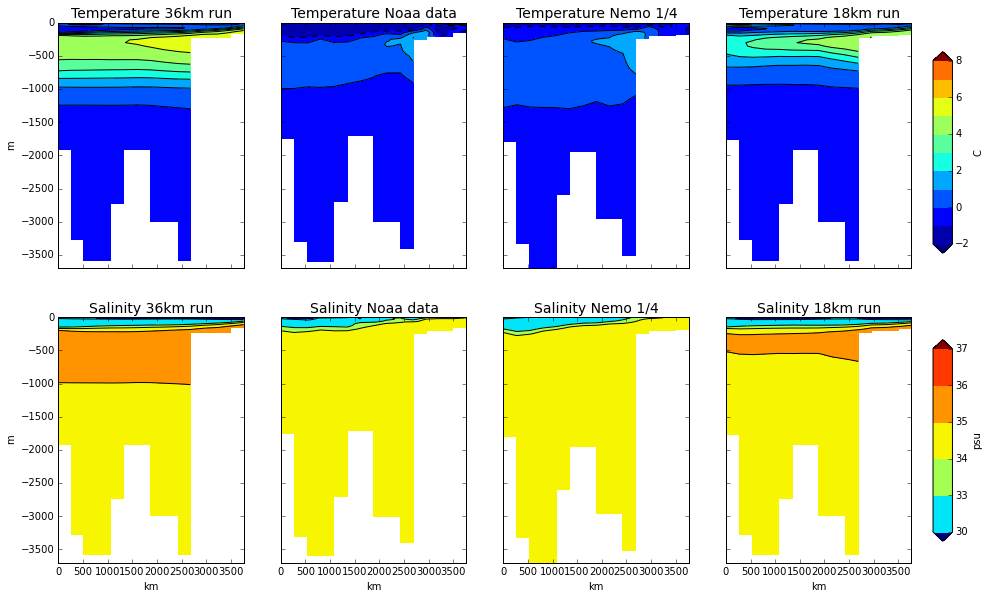

In [14]:
comp_plot(comp_data,arctic2)

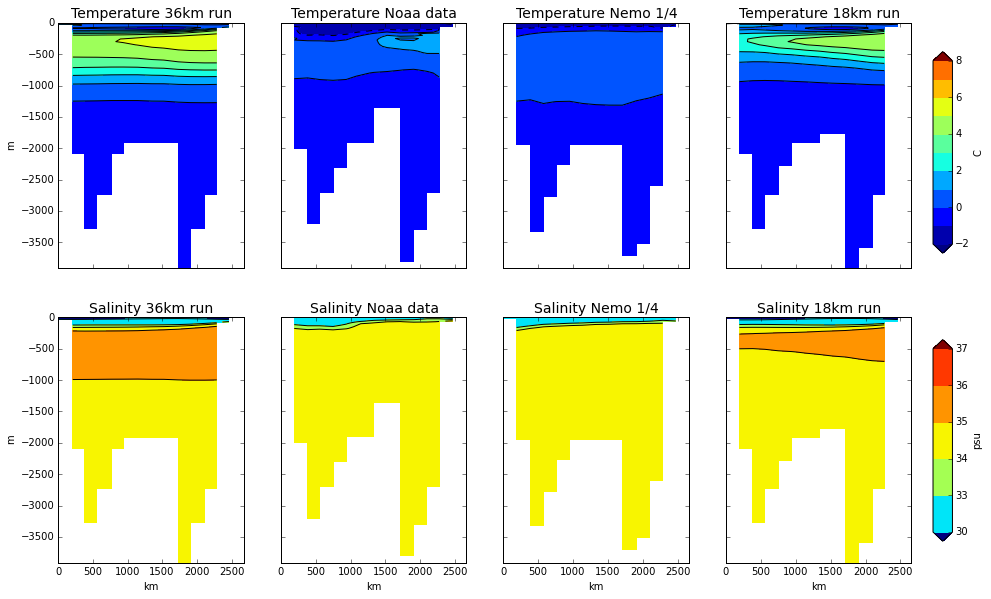

In [15]:
comp_plot(comp_data,arctic3)

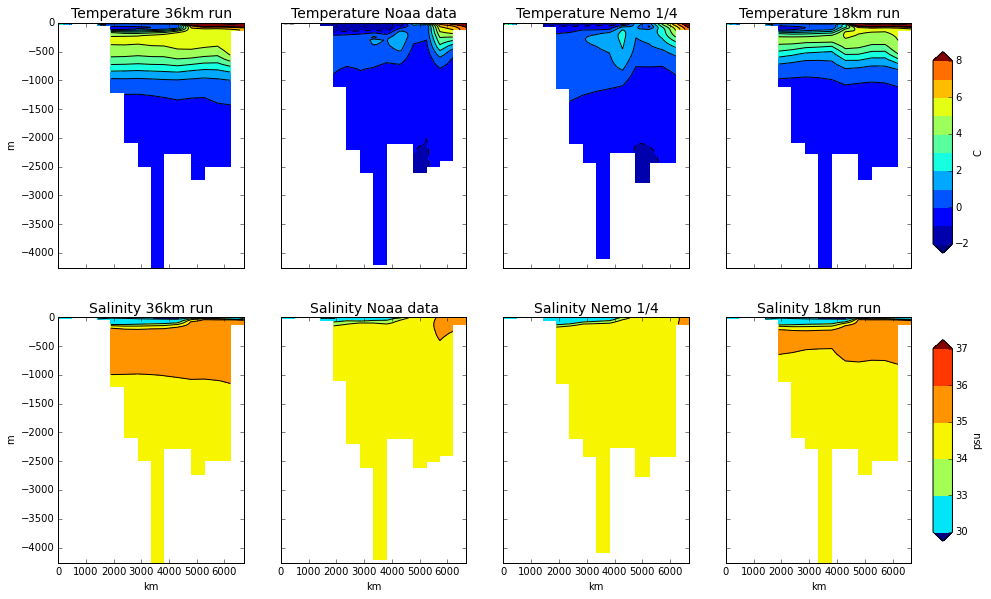

In [16]:
comp_plot(comp_data,arctic4)

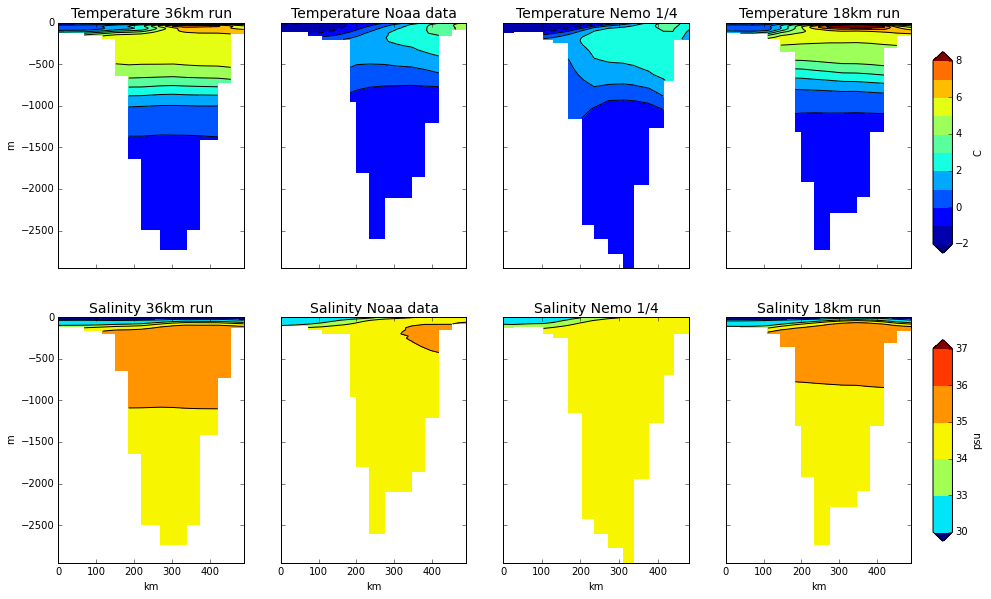

In [17]:
comp_plot(comp_data,fram)

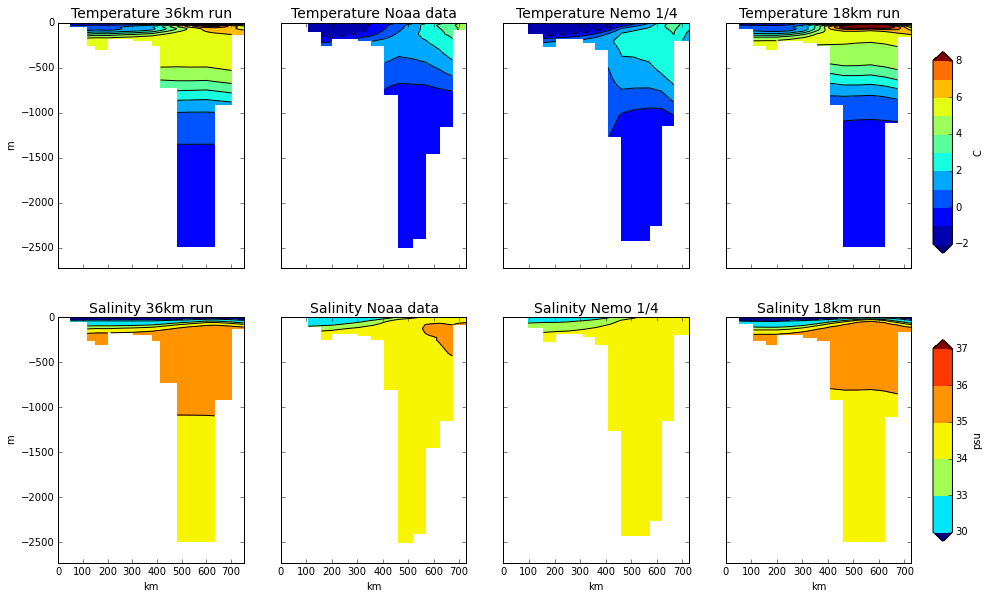

In [18]:
comp_plot(comp_data,barents)

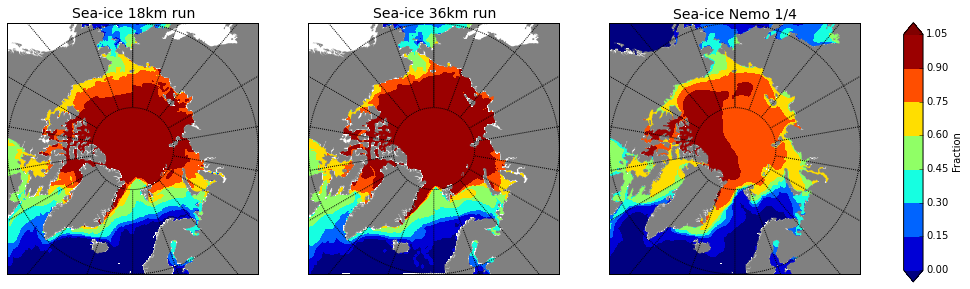

In [19]:
plot_seaice(run18,run36,Nemo25)

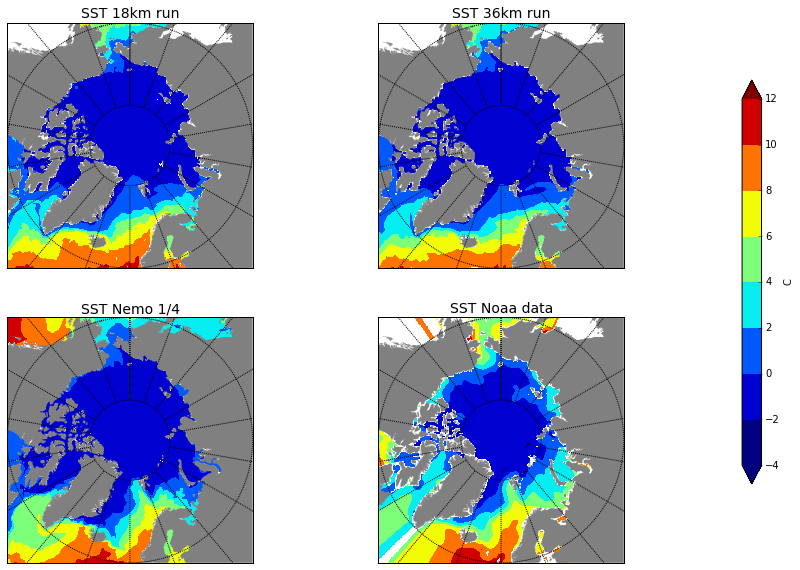

In [20]:
plot_sst(run18,run36,Nemo25,Noaa)

In [21]:
run36v = StateRead()
run36v.readData('/scratch/general/am8e13/results36km_newspinup/',range(100))
run36v.fluxCalc()
run18v = StateRead()
run18v.readData('/scratch/general/am8e13/results36km_newspinup/',range(100))
run18v.fluxCalc()

In [30]:
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print '36km ',run36v.totalFluxes[var]
    print '18km ',run18v.totalFluxes[var]
    print 'liq10',liq10[var]

Barents
36km  {'Outflow': -0.8, 'Total flow': -0.06, 'Inflow': 0.74}
18km  {'Outflow': -0.8, 'Total flow': -0.06, 'Inflow': 0.74}
liq10 {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Bering
36km  {'Outflow': -1.09, 'Total flow': -1.07, 'Inflow': 0.02}
18km  {'Outflow': -1.09, 'Total flow': -1.07, 'Inflow': 0.02}
liq10 {'Outflow': 0.0, 'Total flow': 1.3, 'Inflow': 1.3}
Fram
36km  {'Outflow': -0.96, 'Total flow': 0.86, 'Inflow': 1.83}
18km  {'Outflow': -0.96, 'Total flow': 0.86, 'Inflow': 1.83}
liq10 {'Outflow': -5.5, 'Total flow': -1.6, 'Inflow': 3.9}
Davis
36km  {'Outflow': -0.97, 'Total flow': -0.43, 'Inflow': 0.54}
18km  {'Outflow': -0.97, 'Total flow': -0.43, 'Inflow': 0.54}
liq10 {'Outflow': -3.2, 'Total flow': -2.6, 'Inflow': 0.6}


In [31]:
liq10 = {'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6}
            }